<a href="https://colab.research.google.com/github/mjfoster1313/Matts-Repo/blob/main/Homework7_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 16.6.1 Loading the MNIST Dataset

In [63]:
import numpy as np
import pandas as pd
import time as time

In [64]:
from tensorflow.keras.datasets import fashion_mnist

* **`load_data` function** loads **training** and **testing sets**

In [65]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
# sns.set(font_scale=2)

### Visualizing Digits
* Run cell several times to view different digits and see **why handwritten digit recognition is a challenge**

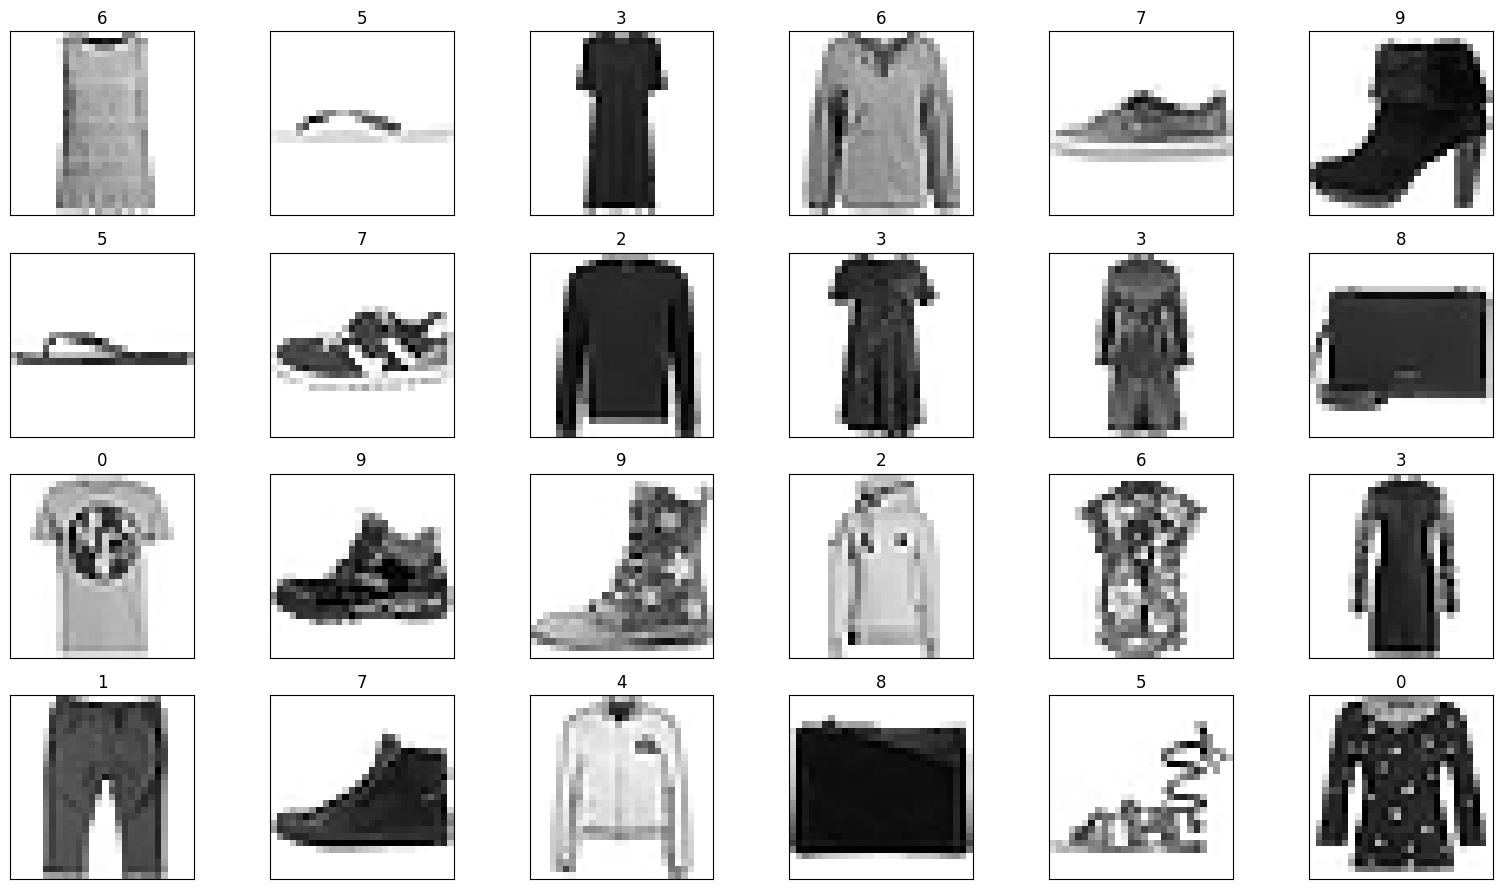

In [66]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [67]:
X_train = X_train.reshape((-1, 28, 28, 1))

In [68]:
X_train.shape

(60000, 28, 28, 1)

In [69]:
X_test = X_test.reshape((-1, 28, 28, 1))

In [70]:
X_test.shape

(10000, 28, 28, 1)

In [71]:
X_train = X_train.astype('float32') / 255

In [72]:
X_test = X_test.astype('float32') / 255

### One-Hot Encoding: Convert Labels to Categorical Data (cont.)
* Transform **`y_train`** and **`y_test`** into **two-dimensional arrays of categorical data**

In [73]:
from tensorflow.keras.utils import to_categorical

In [74]:
y_train = to_categorical(y_train)

In [75]:
y_train.shape

(60000, 10)

In [76]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [77]:
y_test = to_categorical(y_test)

In [78]:
y_test.shape

(10000, 10)

## 16.6.4 Creating the Neural Network
* Configure a **convolutional neural network**
* **`Sequential` model** stacks layers to **execute sequentially**
    * **output** of one layer becomes **input** to the next
    * **Feed-forward network**
    * Later, you’ll see that not all layers feed output to the next layer

In [79]:
from tensorflow.keras.models import Sequential

In [80]:
cnn = Sequential()

In [81]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Adding a Convolution Layer
* **`Conv2D`** implements the convolution layer

In [82]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [84]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [85]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [86]:
cnn.add(Flatten())

In [88]:
cnn.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary
* Use model’s **`summary`** method
* Note layers' **output shapes** and **numbers of parameters**
* **Parameters** are the **weights** that the network **learns** during training [\[1\]](https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491),[\[2\]](https://www.kdnuggets.com/2018/06/deep-learning-best-practices-weight-initialization.html)
* **Relatively small network**, but needs to **learn nearly 500,000 parameters**!
	* This is for **tiny images** that are less than 1/4 the size of icons on smartphone home screens
	* Imagine how many features a network would have to learn to process high-resolution 4K video frames or the super-high-resolution images produced by today’s digital cameras
* In the **`Output Shape`** column, **`None`** means the model does not know in advance how many training samples you’re going to provide

In [35]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          32,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,506 (416.04 KB)

 Trainable params: 106,506 (416.04 KB)

 Non-trainable params: 0 (0.00 B)

### Visualizing a Model’s Structure
* Use the **`plot_model` function** from module `tensorflow.keras.utils`

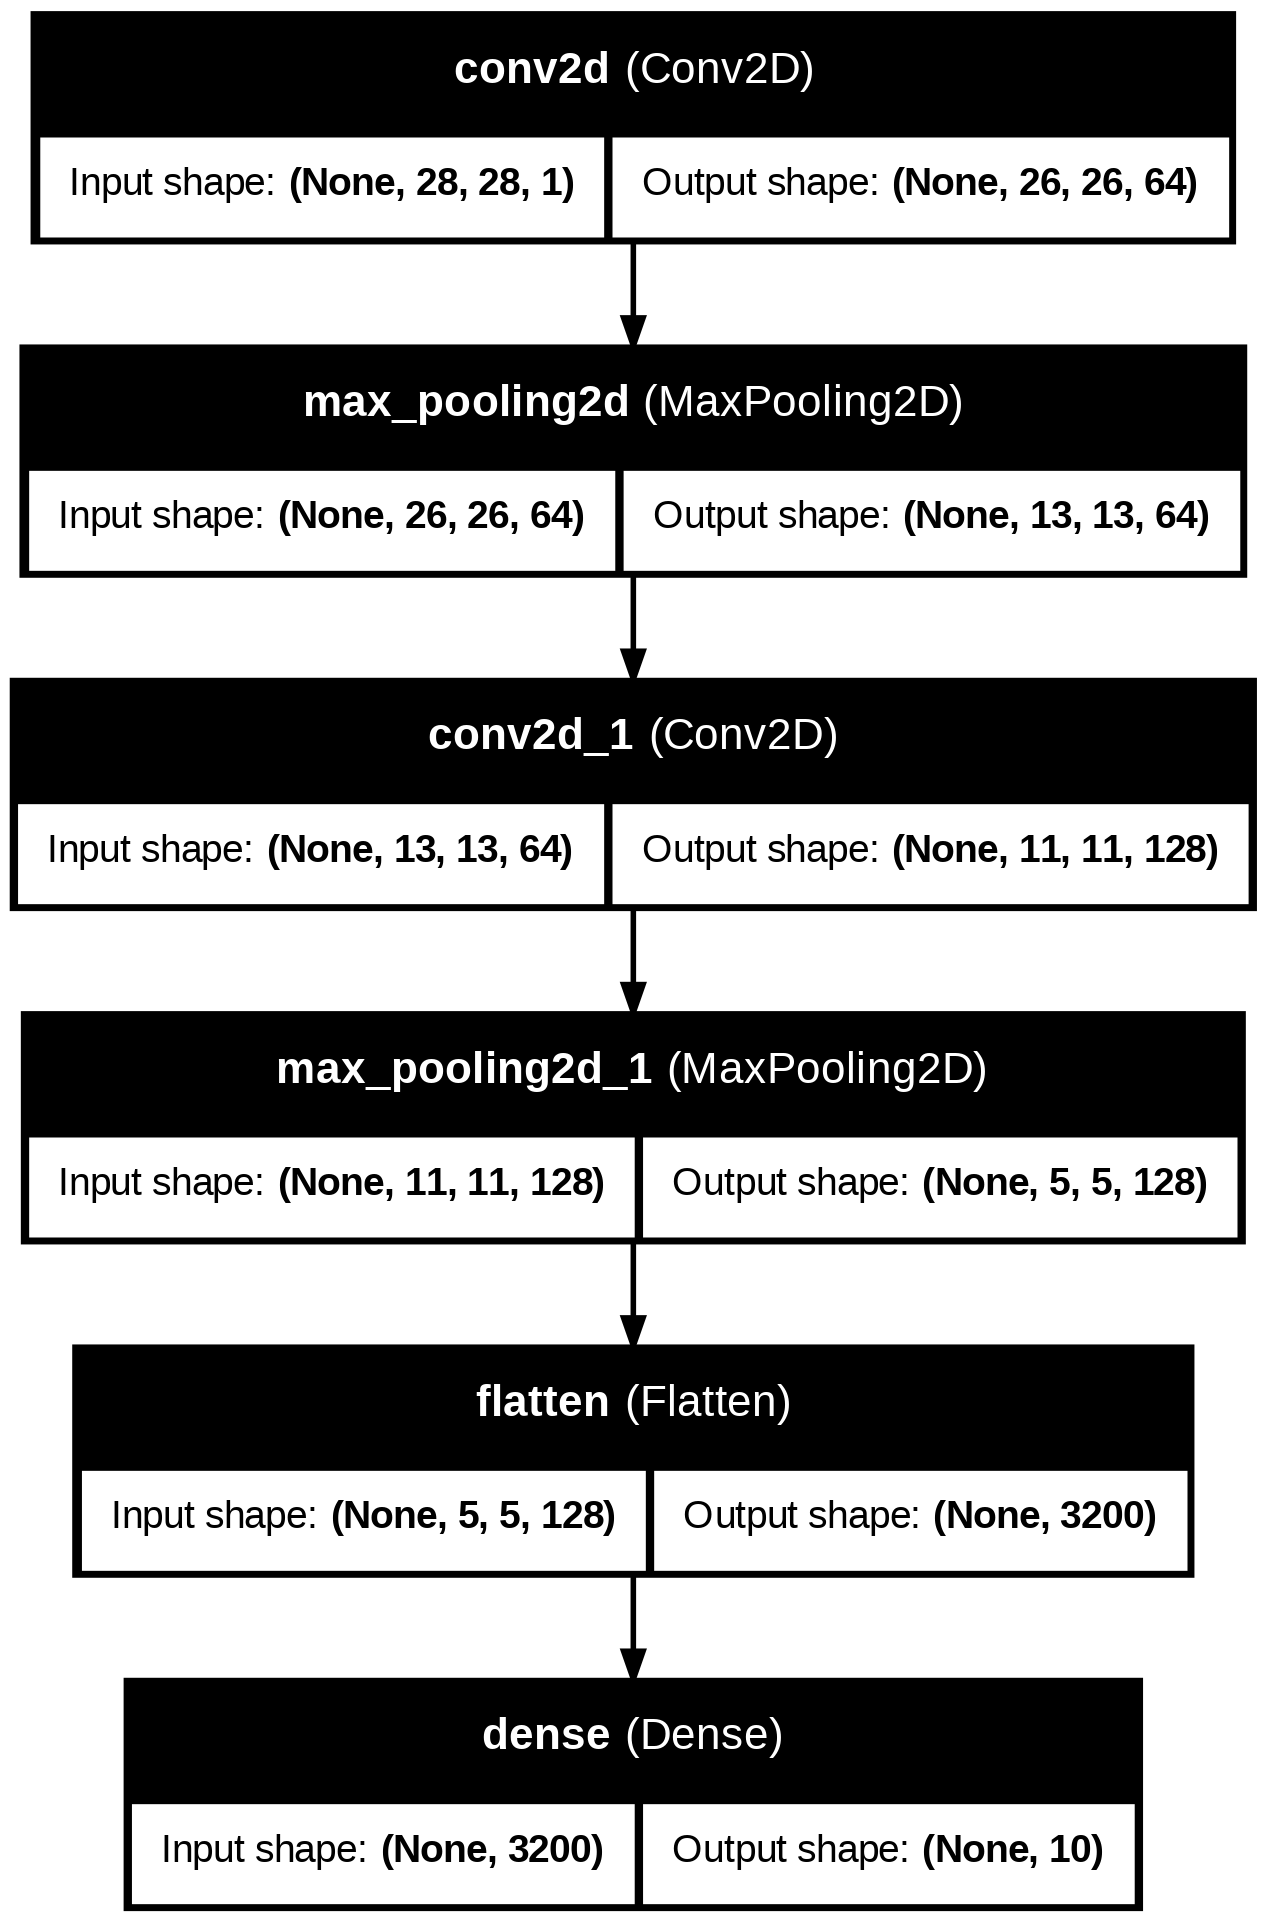

In [36]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

### Compiling the Model
* Complete the model by calling its **`compile` method**

In [91]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 15.6.5 Training and Evaluating the Model (cont.)
* Model took about 5 minutes to train on our CPU.
* **Lecture note: Play convnet timelapse video here**

In [136]:
start = time.time()
first_run = cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
end = time.time()
first_time = end - start
print(first_time)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9802 - loss: 0.0557 - val_accuracy: 0.8963 - val_loss: 0.6912
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9826 - loss: 0.0522 - val_accuracy: 0.8962 - val_loss: 0.7465
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9819 - loss: 0.0513 - val_accuracy: 0.9008 - val_loss: 0.6633
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9824 - loss: 0.0487 - val_accuracy: 0.8967 - val_loss: 0.7147
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9802 - loss: 0.0568 - val_accuracy: 0.8932 - val_loss: 0.6943
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9827 - loss: 0.0478 - val_accuracy: 0.8982 - val_loss: 0.7097
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9836 - loss: 0.0461 - val_accuracy: 0.8943 - val_loss: 0.8424
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9832 - loss: 0.0499 - val_accuracy: 

In [137]:
first_loss, first_accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.8916


In [138]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [139]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [140]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 0.0000000000%
9: 100.0000000000%


In [123]:
images = X_test.reshape((10000, 28, 28))

In [124]:
incorrect_predictions = []

* In the following snippet, **`p`** is the **predicted value array**, and **`e`** is the **expected value array**
* **NumPy’s `argmax` function** determines **index** of an array’s **highest valued element**

In [125]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [141]:
len(incorrect_predictions)  # number of incorrect predictions

1059

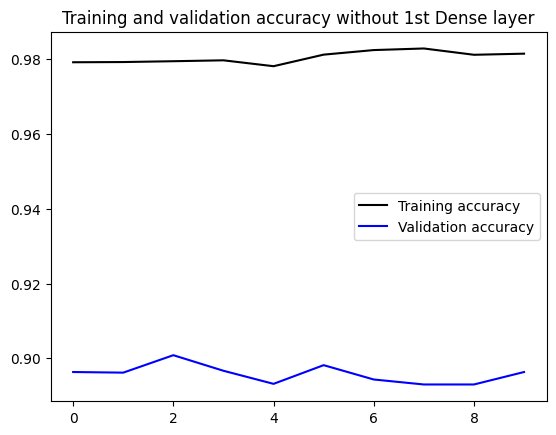

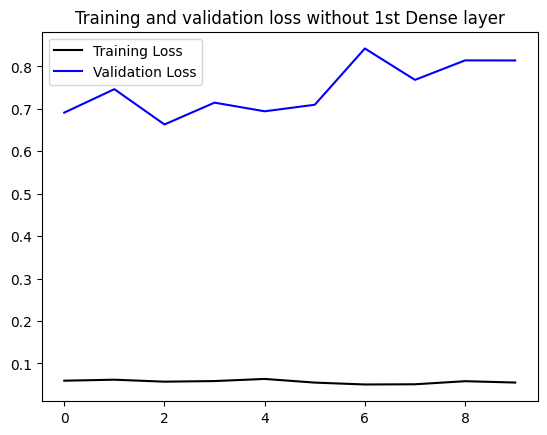

In [142]:
acc = first_run.history['accuracy']
val_acc = first_run.history['val_accuracy']
loss = first_run.history['loss']
val_loss = first_run.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy without 1st Dense layer')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss without 1st Dense layer')
plt.legend()

plt.show()

In [143]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

In [144]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [146]:
start = time.time()
second_run = cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
end = time.time()
second_time = end - start
print(second_time)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9831 - loss: 0.0531 - val_accuracy: 0.8913 - val_loss: 0.9312
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.8917 - val_loss: 0.9555
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.8893 - val_loss: 0.9179
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9844 - loss: 0.0459 - val_accuracy: 0.8953 - val_loss: 0.8847
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9833 - loss: 0.0504 - val_accuracy: 0.8957 - val_loss: 0.8799
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9876 - loss: 0.0347 - val_accuracy: 0.8795 - val_loss: 1.0231
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9794 - loss: 0.0650 - val_accuracy: 0.8932 - val_loss: 0.9507
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9864 - loss: 0.0439 - val_accuracy:

In [147]:
second_loss, second_accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8813 - loss: 1.1504


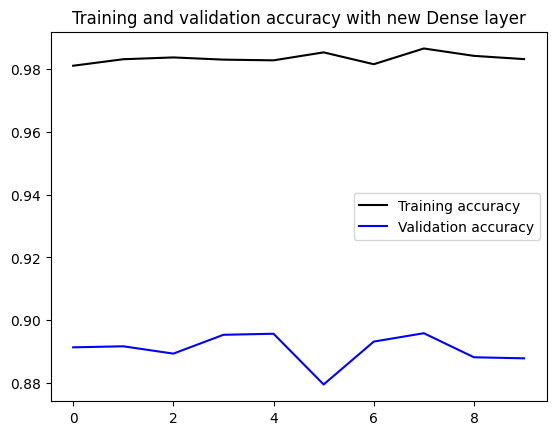

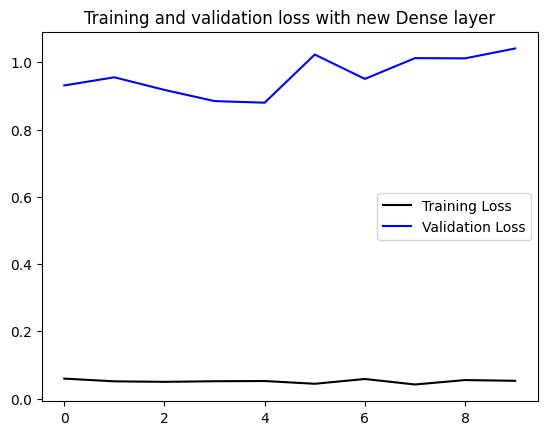

In [148]:
acc = second_run.history['accuracy']
val_acc = second_run.history['val_accuracy']
loss = second_run.history['loss']
val_loss = second_run.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy with new Dense layer')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss with new Dense layer')
plt.legend()

plt.show()

In [149]:
print('Training Time without First Dense layer, in seconds: ', first_time)
print('Training Time with New Dense layer, in seconds: ', second_time)
print('Accuracy without First Dense layer: ', first_accuracy)
print('Accuracy with New Dense layer: ', second_accuracy)

Training Time without First Dense layer, in seconds:  71.67257738113403
Training Time with New Dense layer, in seconds:  81.20749974250793
Accuracy without First Dense layer:  0.8945000171661377
Accuracy with New Dense layer:  0.8848999738693237


The new dense layer of 4096 neurons increases the training time significantly and did not seem to increase accuracy.